Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset 'Finance_data.csv' carregado com sucesso do Google Drive.

--- 16. Detecção de Outliers na coluna: age ---
Outliers (Z-score > 3): 0 registros
Outliers (IQR): 0 registros
----------------------------------------


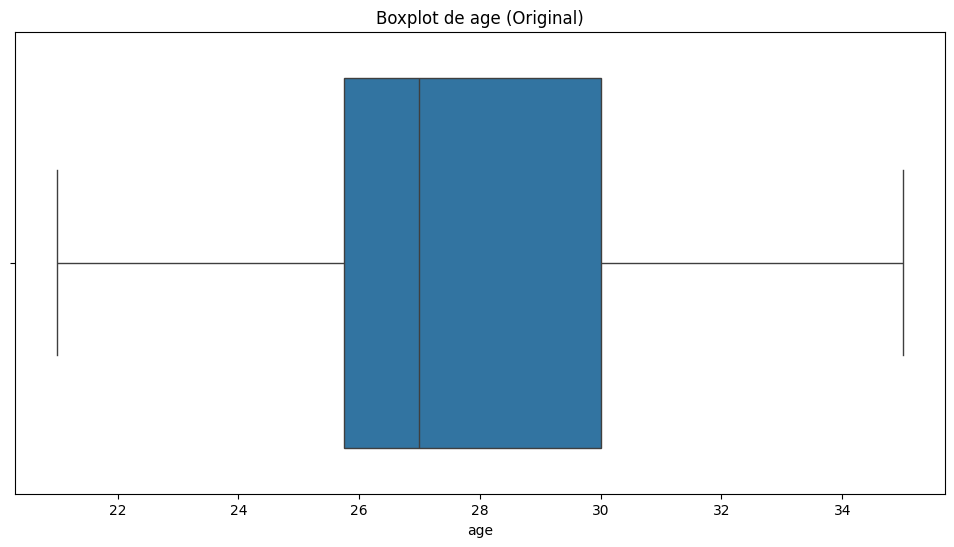

Estratégia 1 (Remoção): 0 registros removidos.
Estratégia 2 (Capping): Outliers substituídos por limites IQR.
Estratégia 3 (Transformação Log): Coluna logarítmica criada.
----------------------------------------
--- 19. Comparação do Impacto nas Estatísticas Descritivas ---
        Original    Remoção    Capping
count  40.000000  40.000000  40.000000
mean   27.800000  27.800000  27.800000
std     3.560467   3.560467   3.560467
min    21.000000  21.000000  21.000000
25%    25.750000  25.750000  25.750000
50%    27.000000  27.000000  27.000000
75%    30.000000  30.000000  30.000000
max    35.000000  35.000000  35.000000


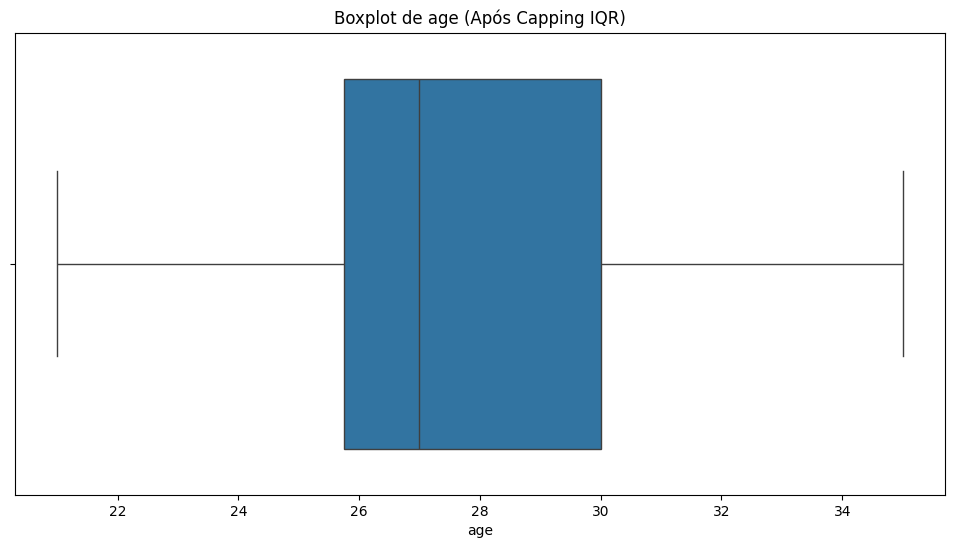

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')
PATH_COMPLETO = '/content/drive/MyDrive/Atividade 14.10/Atividade4/archive (2)/Finance_data.csv'


# Carregar o dataset do Google Drive
try:
    df = pd.read_csv(PATH_COMPLETO)
    df_original = df.copy()
    print("Dataset 'Finance_data.csv' carregado com sucesso do Google Drive.")

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em: {PATH_COMPLETO}")
    print("Verifique se o Google Drive está montado e se o PATH_COMPLETO está correto.")
    exit() # Interrompe a execução se o arquivo não for encontrado

# Selecionar apenas colunas numéricas para análise de outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Coluna de exemplo para demonstração dos outliers
# Usamos 'age' como coluna de exemplo, pois é numérica.
example_col = 'age'
print(f"\n--- 16. Detecção de Outliers na coluna: {example_col} ---")

# Identificar outliers nas colunas numéricas:

# Z-score (Desvio Padrão)
z_scores = np.abs(stats.zscore(df[example_col]))
threshold_z = 3
outliers_z_score = df[z_scores > threshold_z]
print(f"Outliers (Z-score > 3): {len(outliers_z_score)} registros")

# IQR (Interquartile Range)
Q1 = df[example_col].quantile(0.25)
Q3 = df[example_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df[example_col] < lower_bound) | (df[example_col] > upper_bound)]
print(f"Outliers (IQR): {len(outliers_iqr)} registros")
print("-" * 40)

# Visualizar os outliers usando boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[example_col])
plt.title(f'Boxplot de {example_col} (Original)')
plt.show() #

# Implementar diferentes estratégias para lidar com outliers:

# Estratégia 1: Remoção (usando limites IQR)
df_removed = df[~((df[example_col] < lower_bound) | (df[example_col] > upper_bound))].copy()
print(f"Estratégia 1 (Remoção): {len(df_original) - len(df_removed)} registros removidos.")

#Estratégia 2: Capping (substituição por valores limites IQR)
df_capped = df_original.copy()
df_capped[example_col] = np.where(
    df_capped[example_col] > upper_bound,
    upper_bound,
    np.where(
        df_capped[example_col] < lower_bound,
        lower_bound,
        df_capped[example_col]
    )
)
print("Estratégia 2 (Capping): Outliers substituídos por limites IQR.")

#Estratégia 3: Transformação (Logarítmica)
df_transformed = df_original.copy()
# np.log1p calcula log(1 + x), útil para evitar log(0) e reduzir a assimetria
df_transformed[f'{example_col}_log'] = np.log1p(df_transformed[example_col])
print("Estratégia 3 (Transformação Log): Coluna logarítmica criada.")
print("-" * 40)

# Compare o impacto nas estatísticas descritivas
print("--- 19. Comparação do Impacto nas Estatísticas Descritivas ---")
stats_comparison = pd.DataFrame({
    'Original': df_original[example_col].describe(),
    'Remoção': df_removed[example_col].describe(),
    'Capping': df_capped[example_col].describe()
})
print(stats_comparison)

# Visualizar Boxplot após Capping (para mostrar o impacto da técnica)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_capped[example_col])
plt.title(f'Boxplot de {example_col} (Após Capping IQR)')
plt.show() #